# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# 0.1 Loading Dataset

In [2]:
df_raw = pd.read_csv( 'data/insurance_data.csv' ).sort_values( by = 'id' )
df_raw.head()

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
143003,1,Male,44,28.0,26.0,0,40454.0,217,1,1,> 2 Years,Yes
286227,2,Male,76,3.0,26.0,0,33536.0,183,0,1,1-2 Year,No
143004,3,Male,47,28.0,26.0,0,38294.0,27,1,1,> 2 Years,Yes
190848,4,Male,21,11.0,152.0,1,28619.0,203,0,1,< 1 Year,No
238464,5,Female,29,41.0,152.0,1,27496.0,39,0,1,< 1 Year,No


# 1.0 Data Description

In [3]:
df1 = df_raw.copy()

## 1.1 Data Dimension

In [4]:
print( 'Numbers of rows {}'.format( df1.shape[0] ) )
print( 'Numbers of columns {}'.format( df1.shape[1] ) )

Numbers of rows 381109
Numbers of columns 12


## 1.2 Data Types

In [5]:
df1.dtypes

id                        int64
gender                   object
age                       int64
region_code             float64
policy_sales_channel    float64
previously_insured        int64
annual_premium          float64
vintage                   int64
response                  int64
driving_license           int64
vehicle_age              object
vehicle_damage           object
dtype: object

## 1.3 Check NA


In [6]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.4 Data Descriptive

In [7]:
# separo em categoricos e numéricos
num_attributes = df1.select_dtypes( include = ['int64', 'float64']  )
cat_attributes = df1.select_dtypes( exclude = ['int64','float64','datetime64[ns]'] )

In [8]:
# Central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T # calculado a media das colunas -- aplica em todas colunas
ct2 = pd.DataFrame( num_attributes.apply( np.median) ).T # calculando a mediana

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # calculando o std 
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T # calculando o min
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T # calculando o max
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min()  ) ).T # calcula o range
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # calcula o skew
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T # calcula o kurtosis

# concatenate
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.columns = ['features','min','max','range','mean','median','std','skew','kurtosis'] 
m

,features,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,age,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,region_code,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
3,policy_sales_channel,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
4,previously_insured,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,annual_premium,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,vintage,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
7,response,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788
8,driving_license,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302


# 2.0 Feature Engineering

In [9]:
df2 = df1.copy()
df2.head()

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
143003,1,Male,44,28.0,26.0,0,40454.0,217,1,1,> 2 Years,Yes
286227,2,Male,76,3.0,26.0,0,33536.0,183,0,1,1-2 Year,No
143004,3,Male,47,28.0,26.0,0,38294.0,27,1,1,> 2 Years,Yes
190848,4,Male,21,11.0,152.0,1,28619.0,203,0,1,< 1 Year,No
238464,5,Female,29,41.0,152.0,1,27496.0,39,0,1,< 1 Year,No


In [10]:
# vehicle_age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'over_2_years' if x == '> 2 Years' else 'between_1_2_years' 
                                                                        if x == '1-2 Year' else 'below_1_year')
# vehicle_damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x : 1 if x == 'Yes' else 0 )
df2.head()

,id,gender,age,region_code,policy_sales_channel,previously_insured,annual_premium,vintage,response,driving_license,vehicle_age,vehicle_damage
143003,1,Male,44,28.0,26.0,0,40454.0,217,1,1,over_2_years,1
286227,2,Male,76,3.0,26.0,0,33536.0,183,0,1,between_1_2_years,0
143004,3,Male,47,28.0,26.0,0,38294.0,27,1,1,over_2_years,1
190848,4,Male,21,11.0,152.0,1,28619.0,203,0,1,below_1_year,0
238464,5,Female,29,41.0,152.0,1,27496.0,39,0,1,below_1_year,0


# 3.0 Data Filtering

In [11]:
df3 = df2.copy()

# 4.0 EDA

In [12]:
df4 = df3.copy()

## 4.1 Univariate Analysis

<Axes: xlabel='response', ylabel='age'>

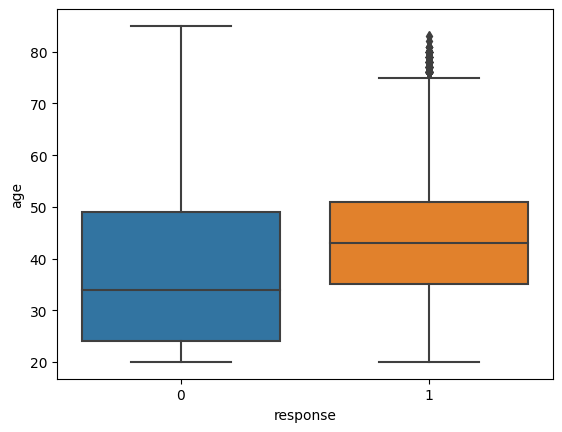

In [13]:
# age - vejo como está o comportamento baseado na idade
sns.boxplot( x = 'response', y = 'age', data = df4 )

<Axes: xlabel='age', ylabel='Count'>

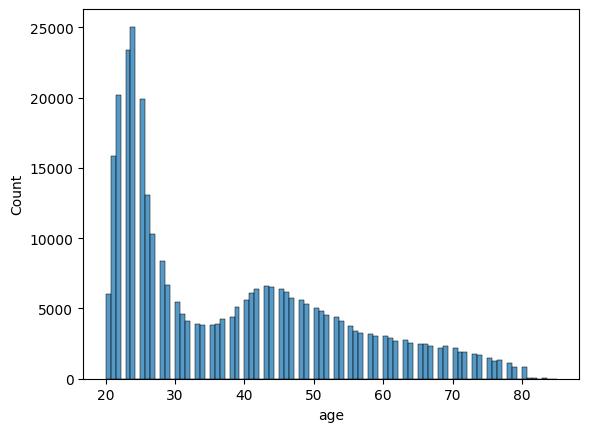

In [14]:
# pessoas que não tem interesse em comprar seguro
aux00 = df4.loc[ df4['response'] == 0 , 'age']
sns.histplot( aux00 )

<Axes: xlabel='age', ylabel='Count'>

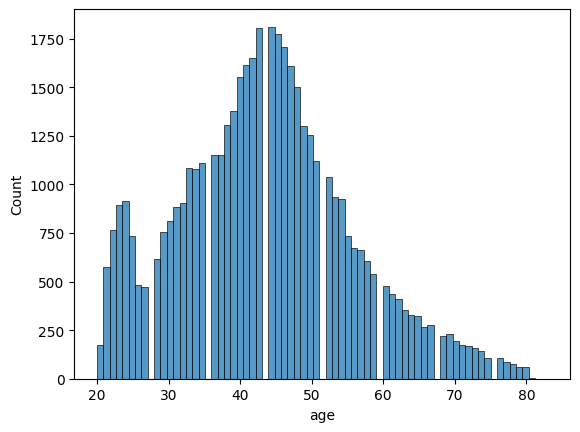

In [15]:
# pessoas que tem interesse em comprar seguro
aux00 = df4.loc[ df4['response'] == 1 , 'age']
sns.histplot( aux00 )

<Axes: xlabel='response', ylabel='annual_premium'>

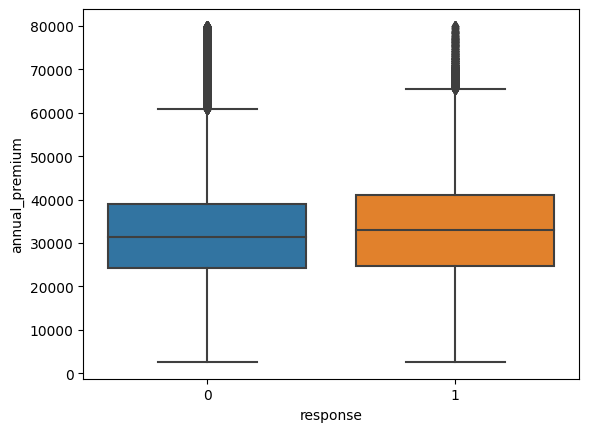

In [16]:
# annual_premium 
df_aux = df4.loc[ df4['annual_premium'] < 80000, : ]
sns.boxplot( x = 'response', y = 'annual_premium', data = df_aux  )

<Axes: xlabel='annual_premium', ylabel='Count'>

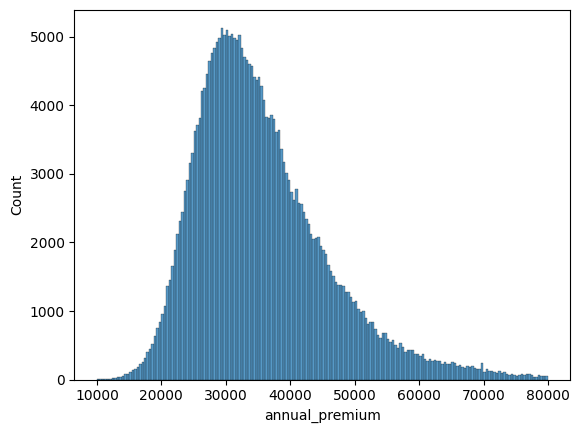

In [17]:
# verifico a distribuição
df_aux = df4.loc[ (df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000), : ]
aux00 = df_aux.loc[ df4['response'] == 0 , 'annual_premium']
sns.histplot( aux00 )

<Axes: xlabel='annual_premium', ylabel='Count'>

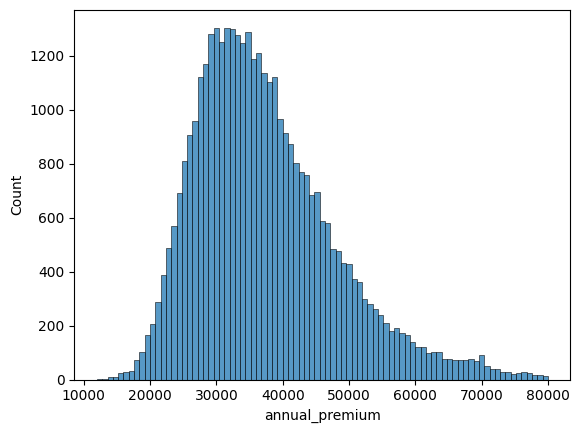

In [18]:
# verifico a distribuição
aux00 = df_aux.loc[ df4['response'] == 1 , 'annual_premium']
sns.histplot( aux00 )

<Axes: xlabel='response', ylabel='driving_license'>

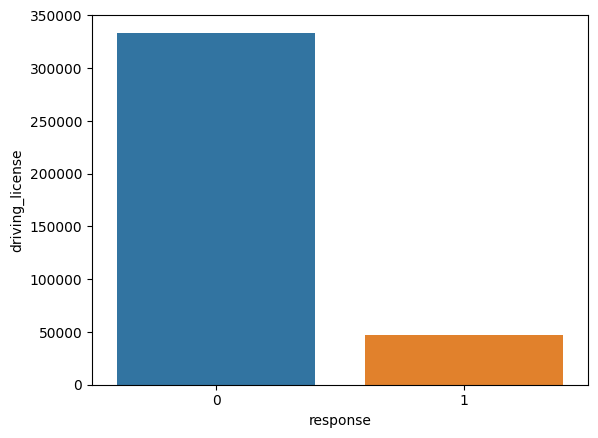

In [19]:
# driving_license
aux = df4[[ 'driving_license', 'response' ]].groupby( by = 'response' ).sum().reset_index()
sns.barplot( x = 'response', y = 'driving_license', data = aux )

In [20]:
# driving_license em %
aux['driving_license_perc'] = aux['driving_license'] / aux['driving_license'].sum() 
aux

,response,driving_license,driving_license_perc
0,0,333628,0.877283
1,1,46669,0.122717


<Axes: xlabel='region_code', ylabel='id'>

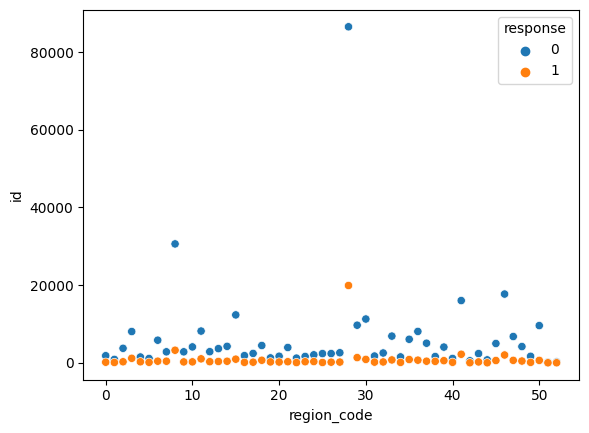

In [21]:
# region_code
aux0 = df4[['id','region_code','response']].groupby( by = ['region_code','response'] ).count().reset_index()
sns.scatterplot( x = 'region_code', y = 'id', hue = 'response', data = aux0 )

In [22]:
# previously_insured
pd.crosstab( df4['previously_insured'], df4['response'] ).apply( lambda x: x / x.sum(), axis = 1 )

response,0,1
previously_insured,,
0,0.774546,0.225454
1,0.999095,0.000905


In [37]:
# vehicle_age
df4[['vehicle_age','response']].value_counts( normalize = True ).reset_index().sort_values(by = 'vehicle_age')

,vehicle_age,response,proportion
1,below_1_year,0,0.413488
4,below_1_year,1,0.018897
0,between_1_2_years,0,0.434285
2,between_1_2_years,1,0.091328
3,over_2_years,0,0.029663
5,over_2_years,1,0.012338


<Axes: xlabel='response', ylabel='policy_sales_channel'>

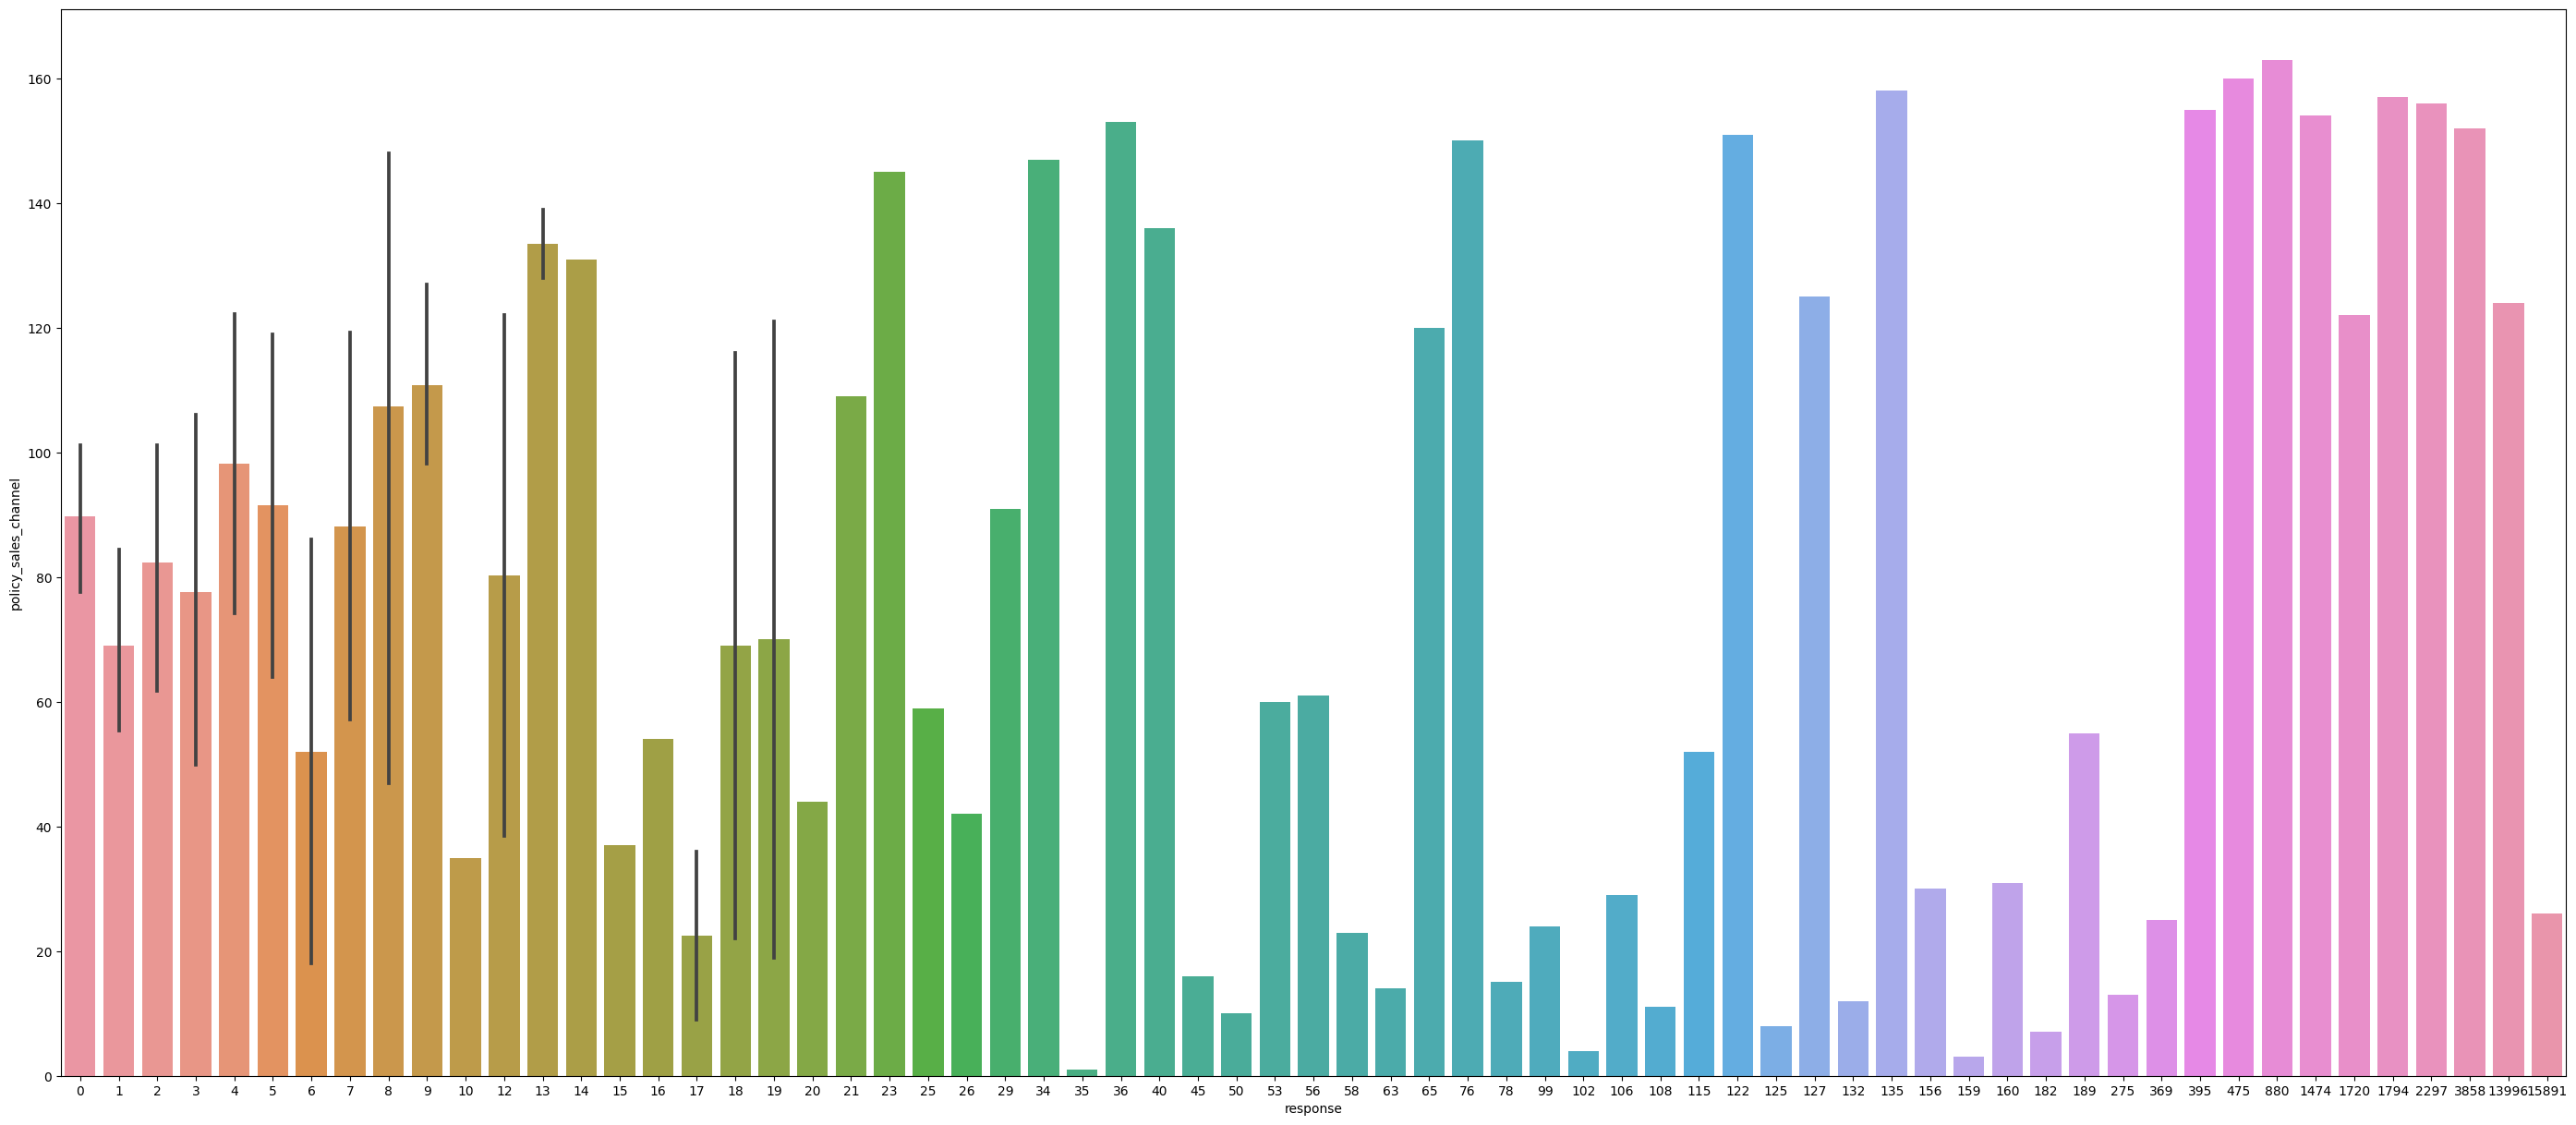

In [55]:
# policy_sales_channel
plt.figure( figsize = (35,15) )
aux = df4[['policy_sales_channel','response']].groupby( 'policy_sales_channel' ).sum().reset_index()
sns.barplot( x = 'response', y = 'policy_sales_channel', data = aux )

<Axes: xlabel='response', ylabel='vintage'>

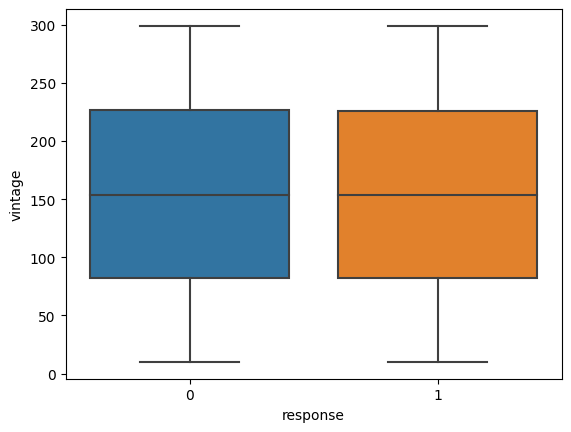

In [56]:
# vintage
sns.boxplot( x = 'response', y = 'vintage', data = df4 )

<Axes: xlabel='vintage', ylabel='Count'>

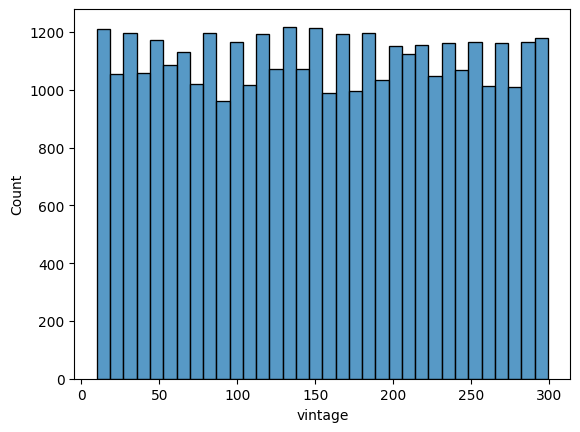

In [57]:
aux00 = df_aux.loc[ df4['response'] == 1 , 'vintage']
sns.histplot( aux00 )

<Axes: xlabel='vintage', ylabel='Count'>

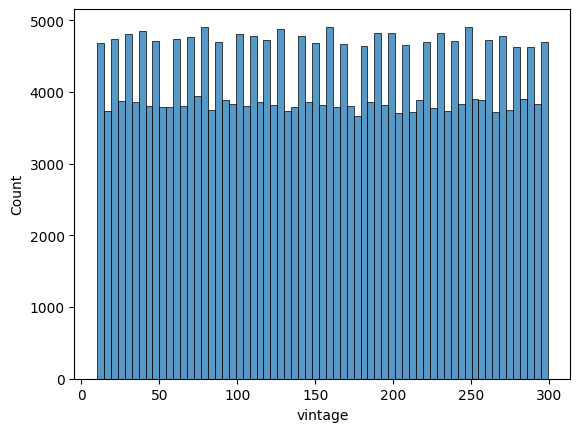

In [58]:
aux00 = df_aux.loc[ df4['response'] == 0 , 'vintage']
sns.histplot( aux00 )

# 5.0 Data Preparation

In [59]:
df5 = df4.copy()

In [60]:
df5.columns

Index(['id', 'gender', 'age', 'region_code', 'policy_sales_channel',
       'previously_insured', 'annual_premium', 'vintage', 'response',
       'driving_license', 'vehicle_age', 'vehicle_damage'],
      dtype='object')

## Standardization

In [ ]:
# annual_premium

## Rescaling

In [ ]:
# age

# vintage


## Encoder

In [ ]:
# driver licencse

# region code

# previously_insured

# vehicle_age

# vehicle_damage

# policy_sales_channel



# 6.0 Feature Selection

# 7.0 Machine Learning 